# Project 2 #

Everyone has to do Part 1. Pick one of the themes for Part 2. 

#### Data sets ####
For this project you will use the MNIST data from last lecture as well as the Cats and Dogs data set: 99 images of Cats and 99 images of Dogs. Each cat-dog image is 64 by 64 pixels so it's pretty low resolution. The data set is of dimension 198 by 4096 (64 times 64), i.e. raster scans of the images. The .txt file containing the images.
Here are 4 examples:

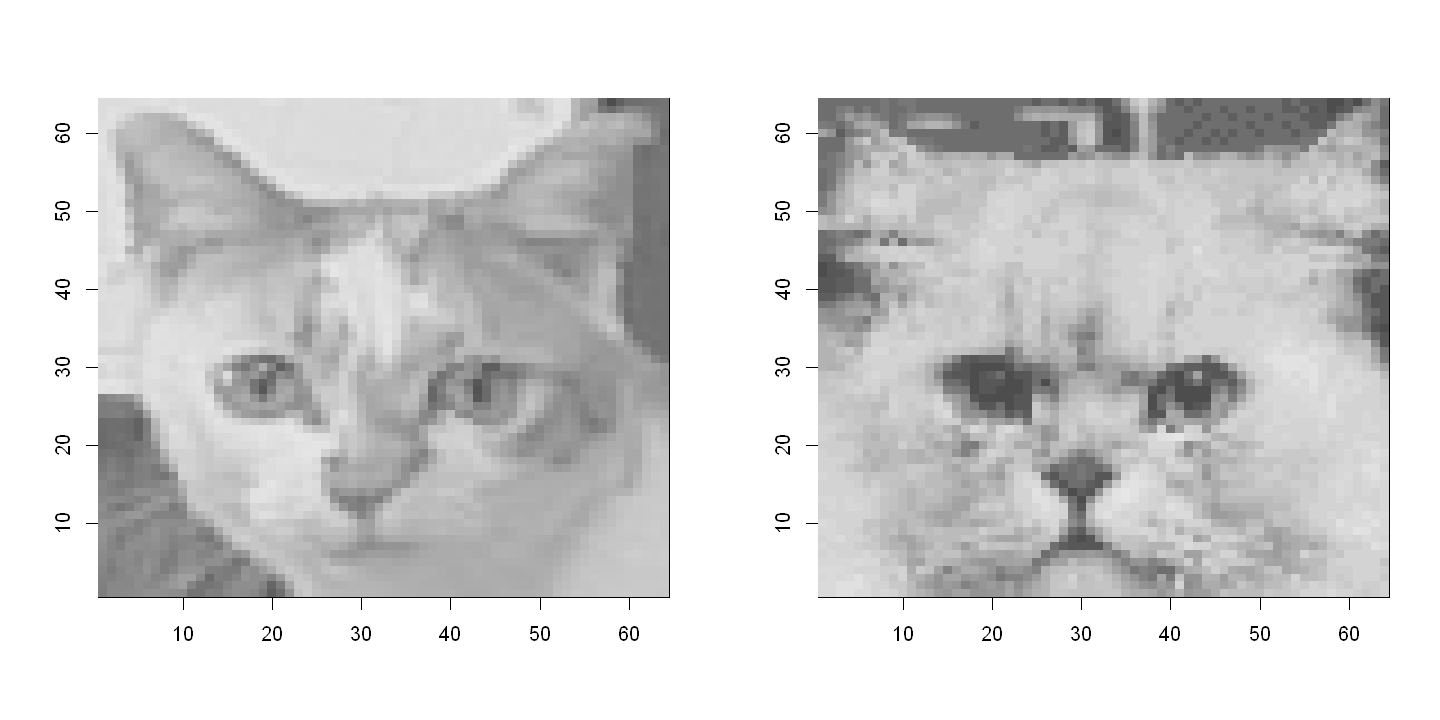

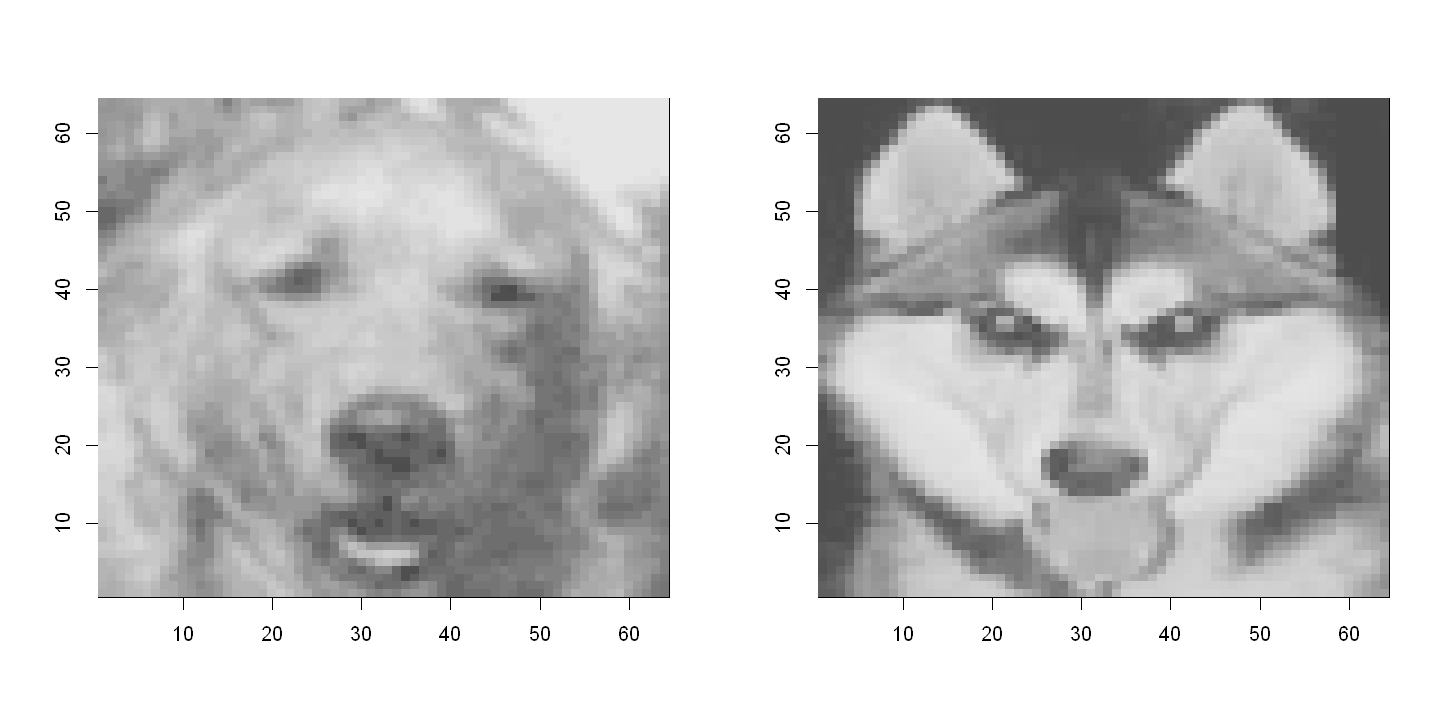

In [17]:
catdogdata<-as.matrix(read.table("catdogdata.txt")) # np.loadtxt in python
Labels<-rep(0,198)
Labels[100:198]<-1
#
rotateM <- function(x) t(apply(x, 2, rev)) # the images are raster scans. Here, I just resort them for the
                                           # default image command in R to plot them with the right orientation.
#
library(repr)
options(repr.plot.width=12, repr.plot.height=6)
#
set.seed(1000012)
ssc<-sample(seq(1,198)[Labels==0],2,replace=F)
ssd<-sample(seq(1,198)[Labels==1],2,replace=F)
par(mfrow=c(1,2))
image(seq(1,64),seq(1,64),rotateM(matrix(catdogdata[ssc[1],],64,64)),col=gray.colors(256),xlab="",ylab="")
image(seq(1,64),seq(1,64),rotateM(matrix(catdogdata[ssc[2],],64,64)),col=gray.colors(256),xlab="",ylab="")
image(seq(1,64),seq(1,64),rotateM(matrix(catdogdata[ssd[1],],64,64)),col=gray.colors(256),xlab="",ylab="")
image(seq(1,64),seq(1,64),rotateM(matrix(catdogdata[ssd[2],],64,64)),col=gray.colors(256),xlab="",ylab="")

The MNIST data set (or one that you construct with flipped images and subsets of digits) is of smaller dimension, larger sample size but contains more classes. 

The cats-and-dogs data set is high-dimensional, small sample size but contains only 2 classes. As you will see, the cats-and-dogs data set is more difficult to classify compared to the digits.

### Part 1 ###

Use at least 3 different classifiers and at least two feature selection methods. 

For example, you can use filtering or wrappers in conjuction with any of the classifiers (using e.g. threshholds on the importance, t-tests/F-tests or CV-error with forward selection etc). I.e., for the filtering method you choose a test or scoring mechanism and use CV to determine the optimal thresshold. 

For the wrapper method you choose, e.g., forward selection or backward selection, CV is used when to stop adding features. Here, the scoring mechanism to decide which order to drop/add features can be based on drop/increase in predictive performance, importance metrics, etc.

The embedding methods we have talked about in class is lasso/elastic net which is used with multinomial/logistic regression.For the embedding methods, CV is used to choose the penalty parameter.

Note, you can also use a combination of techniques - perhaps you want to filter the features before you use wrappers or embedding methods? 


#### Questions to answer ####

On each of the two data sets:

a) Using CV, determine how many features (pixels) you need for classification. Does the optimal number of features differ between the approaches? 

b) Which pixels are selected? Does this differ between the approaches/classification methods? (Can you think of why?)

c) Repeat the above a few times - *is the selection stable*? (meaning the number of features needed and/or which pixels are chosen is roughly the same across multiple runs). 


### Part 2 ###

#### Theme 1 - Missing features, block-wise selection ####
a) Contaminate the data to make a subset of features irrelevant for classification. That is randomly, select a pixel location and for each image make it into a pure noise feature. Investigate how many features you can contaminate before classification performance drops off. 

b) What if you can only choose a B $\times$ B block of pixels? Which is the smallest $B$ and which such (non-overlapping) block is the best for classification?


#### Theme 2 - Random projections vs PCA ####
What if instead you use CV to determine the optimal number of PCAs (or other dimension reduction procedure)? How many PCAs (or lower dimensional representation features) do you need for classification? 

What if you reduced the dimension by projecting onto random components? In R, you can for example use the package Rdimtools https://search.r-project.org/CRAN/refmans/Rdimtools/html/linear_RNDPROJ.html. In python, the package is https://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html. One can, in fact, show that, provided you use enough random projections, you can approximate the data quite well using this approach.

How many of the random projections do you need to classify the data? Compare to the number of PCAs in terms of numbers, stability of selection and how similar/different the results are across classification/selection methods. Compare to the feature selection task in part 1. 

#### Theme 3 - sample size and feature selection ####
Repeat Part 1 but decrease the sample size (try a couple of different sizes). 

How does this affect feature selection in terms of number of features, stability of selection, etc?

